In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.9.2


In [3]:
# fashion MNIST load
fashion_mnist = tf.keras.datasets.fashion_mnist

# load_data() -> 네 개의 numpy 배열 return
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## train_images | train_labels | test_images | test_labels format

In [5]:
train_images.shape

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## 데이터 전처리

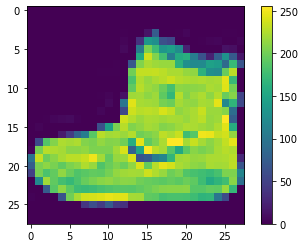

In [10]:
# train_images에 있는 이미지의 픽셀 범위가 0~255임
plt.figure() #새로운 figure 생성
plt.imshow(train_images[0]) #train_images에 있는 첫번째 이미지
plt.colorbar() #colorbar를 plot에 추가
plt.grid(False) #격자 없애기
plt.show() #그래프 화면에 나타내기

In [13]:
# 신경망 모델에 주입하기 전에 0~255이었던 값들을 모두 0~1 사이로 조정
# train_images와 test_images를 같은 방식으로 전처리하는 것이 중요함
train_images = train_images / 255.0
test_images = test_images / 255.0

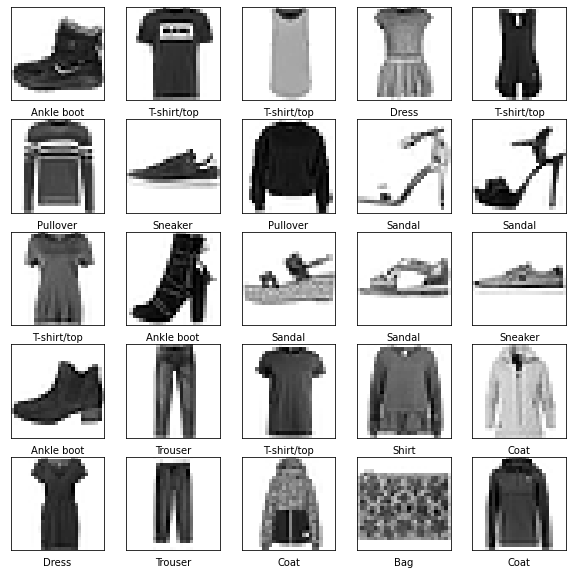

In [16]:
# test_images에서 처음 25개의 이미지와 그 아래에 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # plt.subplot(row,column,index)
    plt.xticks([]) # 눈금표시하기 (빈 배열이므로 실제로는 눈금이 나오지는 않음)
    plt.yticks([]) # 눈금표시하기 (빈 배열이므로 실제로는 눈금이 나오지는 않음)
    plt.grid(False) # 격자 없애기
    plt.imshow(train_images[i], cmap=plt.cm.binary) # GRAY-scale로 변환 후 보여줌
    plt.xlabel(class_names[train_labels[i]]) # x축(subplot)에 class_name 넣기
plt.show()

## 모델 구성

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 2차원 배열의 이미지 포맷을 28*28 픽셀의 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'), # 128개의 뉴런을 가짐
    tf.keras.layers.Dense(10) # 10개 뉴런의 softmax층 -> 10개의 확률을 반환하고 반환된 값의 합은 1임
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-12 09:55:15.352088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-12 09:55:15.352385: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 모델 컴파일

In [18]:
model.compile(optimizer='adam', # Adam Algorithm을 구현하는 Optimizer
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 훈련 중 모델이 얼마나 정확한지 측정
              metrics=['accuracy']) # 훈련 및 테스트 단계를 모니터링

# optimizer : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers?hl=ko
# loss : https://www.tensorflow.org/api_docs/python/tf/keras/losses?hl=ko
# metrics : https://www.tensorflow.org/api_docs/python/tf/keras/metrics?hl=ko

## 모델 훈련

In [19]:
# 모델이 image와 label을 매핑하는 방법을 배움
model.fit(train_images, train_labels, epochs=10)

# fit : https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=ko#fit

# epoch(에포크)
# 훈련 데이터셋에 포함된 모든 데이터들이 한 번씩 모델을 통과한 횟수로, 모든 학습 데이터셋을 한 번 통과했다는 의미가 됨
# 1 epoch는 전체 학습 데이터셋이 한 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 의미
# epochs=10 | 학습 데이터 셋을 10회 모델에 학습시켰다는 의미
# epoch를 높일수록, 다양한 무작위 가중치로 학습을 하므로 적합한 파라미터를 찾을 확률이 올라감
# 하지만 epoch를 지나치게 높이게 되면, 그 학습 데이터셋에 과적합되어 다른 데이터에 대해선 제대로 된 예측을 하지 못할 수 있음

Epoch 1/10


2022-06-12 10:01:46.929709: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-12 10:01:47.120066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.5003 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3768 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3355 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3130 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2955 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2792 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2662 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2598 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2472 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2388 - accu

## 정확도 평가

In [20]:
# test_images, test_labels로 학습모델의 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# verbose : 함수 수행 시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가 나타냄
# verbose = 0 | 출력하지 않음
# verbose = 1 | 자세히 출력
# verbose = 2 | 함축적인 정보만 출력

print('\nTest Accuracy : ' , test_acc)

2022-06-12 10:08:59.935629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3431 - accuracy: 0.8798 - 1s/epoch - 4ms/step

Test Accuracy :  0.879800021648407


## 예측하기

In [21]:
# 훈련된 모델을 사용하여 이미지에 대한 예측을 수행, 아래의 경우 Softmax레이어를 연결하여 확률 변환
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images) # test_images에 있는 각 이미지의 레이블 예측

105/313 [=========>....................] - ETA: 0s

2022-06-12 10:12:44.052933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


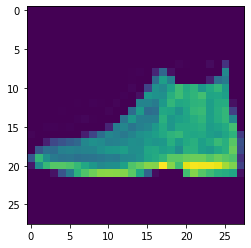

In [22]:
# test_images[0]의 사진
plt.figure() #새로운 figure 생성
plt.imshow(test_images[0]) #train_images에 있는 첫번째 이미지
plt.grid(False) #격자 없애기
plt.show() #그래프 화면에 나타내기

In [34]:
# test_labels[0]
print("Orignial :" , test_labels[0] , "|", class_names[test_labels[0]])

# 학습 모델의 예측
print("Prediction :" , np.argmax(predictions[0]) , "|", class_names[np.argmax(predictions[0])])

#
if test_labels[0] == np.argmax(predictions[0]):
  print("[Prediction Result] : true")

else:
  print("[Prediction Result] : false")


Orignial : 9 | Ankle boot
Prediction : 9 | Ankle boot
[Prediction Result] : true


In [36]:
# 10개의 클래스에 대한 예측을 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # 결과 출력
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

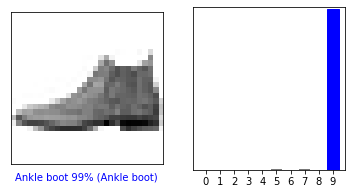

In [37]:
# [0]이미지에 대한 예측 결과와 확률
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

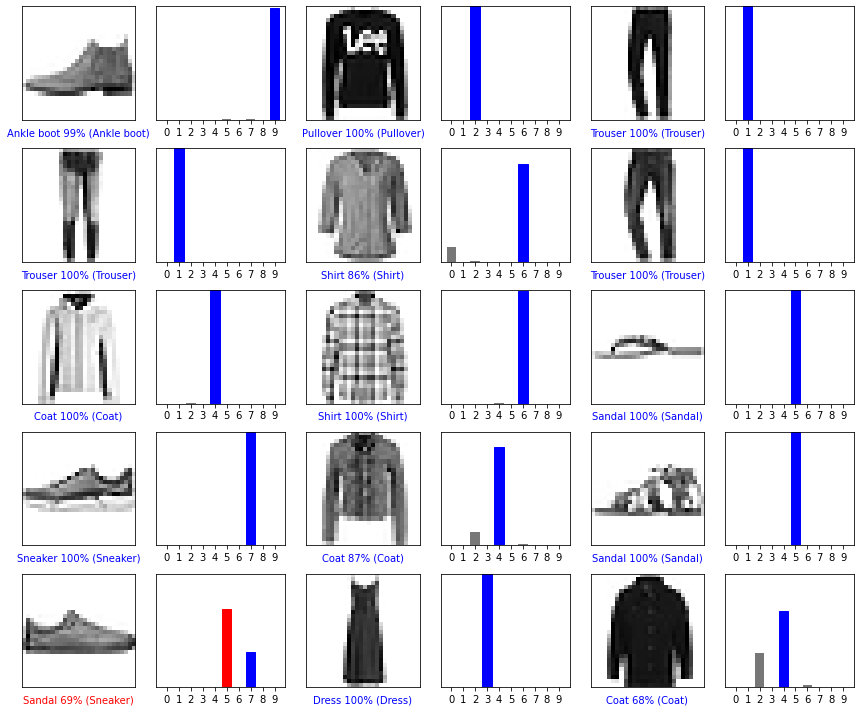

In [38]:
# 25개에 대한 예측 결과
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

In [39]:
# test_images에서 사진 하나 가져오기
img = test_images[1]

print(img.shape)

(28, 28)


In [40]:
#차원 추가
img = (np.expand_dims(img,0)) 

print(img.shape)

(1, 28, 28)


In [41]:
# 임의의 데이터에 대한 예측을 만듦

predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 376ms/step
[[1.3899639e-04 1.5273461e-14 9.9941003e-01 1.1397389e-09 2.8222479e-04
  5.9296128e-13 1.6871827e-04 2.2219953e-16 2.6474335e-12 2.1105620e-13]]


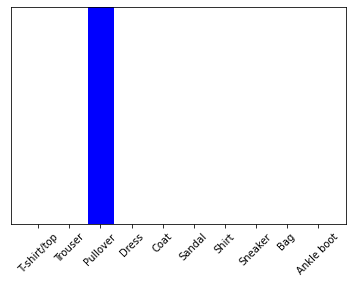

This is  Pullover


In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

print("This is ", class_names[np.argmax(predictions_single[0])])